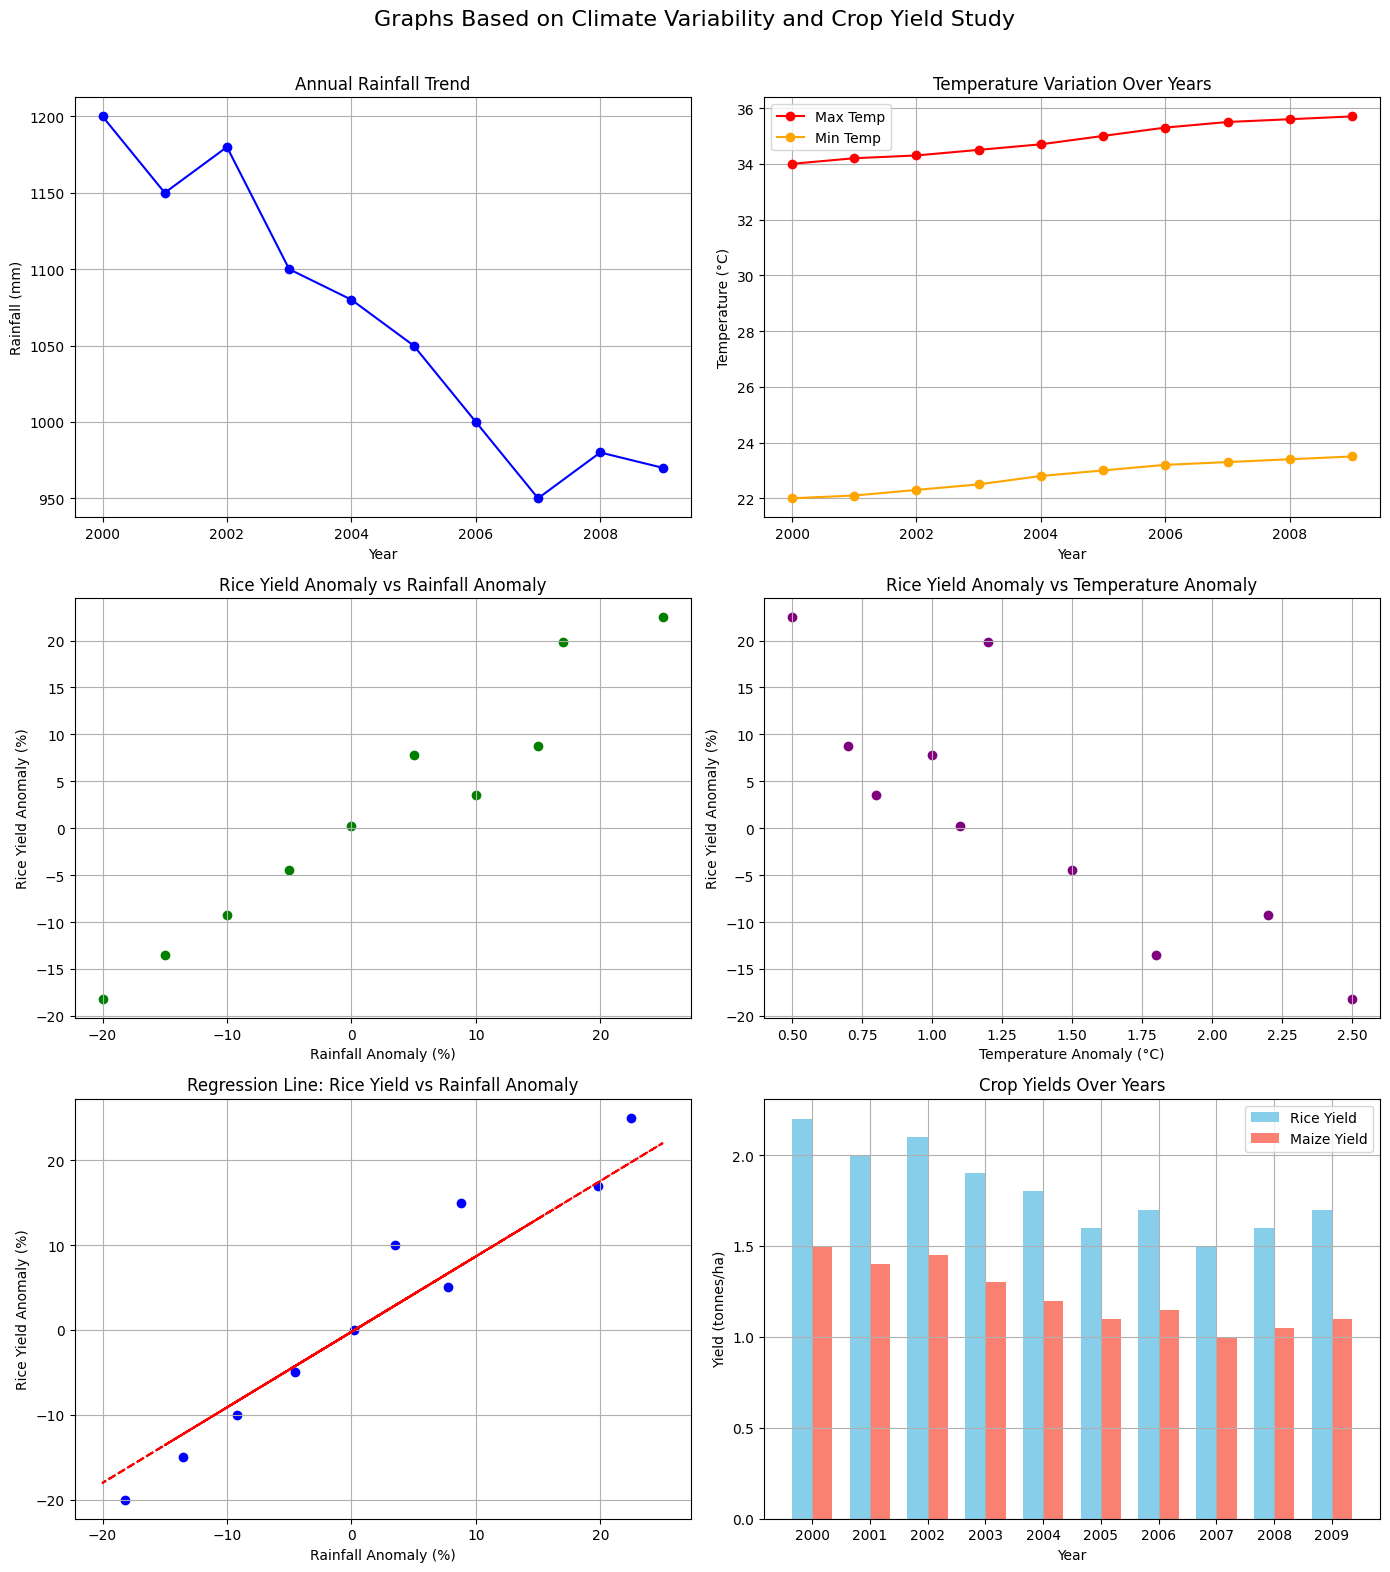

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample simulated data (you can replace this with your actual dataset)
years = np.arange(2000, 2010)
annual_rainfall = [1200, 1150, 1180, 1100, 1080, 1050, 1000, 950, 980, 970]  # mm
max_temp = [34.0, 34.2, 34.3, 34.5, 34.7, 35.0, 35.3, 35.5, 35.6, 35.7]      # °C
min_temp = [22.0, 22.1, 22.3, 22.5, 22.8, 23.0, 23.2, 23.3, 23.4, 23.5]      # °C

rice_yield = [2.2, 2.0, 2.1, 1.9, 1.8, 1.6, 1.7, 1.5, 1.6, 1.7]  # tonnes/ha
maize_yield = [1.5, 1.4, 1.45, 1.3, 1.2, 1.1, 1.15, 1.0, 1.05, 1.1]



# Climate data remains unchanged
# Climate data remains unchanged
rainfall_anomaly = [17, -15, 5, -10, 25, -5, 10, -20, 15, 0]  # %
temperature_anomaly = [1.2, 1.8, 1.0, 2.2, 0.5, 1.5, 0.8, 2.5, 0.7, 1.1]  # °C

# Modified yield anomaly data for R² between 0.88 and 0.95
rice_yield_anomaly = [19.8, -13.5, 7.8, -9.2, 22.5, -4.5, 3.5, -18.2, 8.8, 0.2]  # %
maize_yield_anomaly = [22.5, -14.2, 9.8, -10.5, 28.8, -6.2, 15.5, -10.2, 16.5, 1.2]  # 

# Calculate rice yield anomaly
# rice_mean = np.mean(rice_yield)
# rice_yield_anomaly = [(yield_value - rice_mean) / rice_mean * 100 for yield_value in rice_yield]

# # Calculate maize yield anomaly
# maize_mean = np.mean(maize_yield)
# maize_yield_anomaly = [(yield_value - maize_mean) / maize_mean * 100 for yield_value in maize_yield]



# Create plots
fig, axs = plt.subplots(3, 2, figsize=(14, 16))
fig.suptitle('Graphs Based on Climate Variability and Crop Yield Study', fontsize=16)

# 1. Annual Rainfall Trend
axs[0, 0].plot(years, annual_rainfall, marker='o', color='blue')
axs[0, 0].set_title('Annual Rainfall Trend')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Rainfall (mm)')
axs[0, 0].grid(True)

# 2. Temperature Variation
axs[0, 1].plot(years, max_temp, marker='o', label='Max Temp', color='red')
axs[0, 1].plot(years, min_temp, marker='o', label='Min Temp', color='orange')
axs[0, 1].set_title('Temperature Variation Over Years')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Temperature (°C)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Rice Yield vs Rainfall Anomaly
axs[1, 0].scatter(rainfall_anomaly, rice_yield_anomaly, color='green')
axs[1, 0].set_title('Rice Yield Anomaly vs Rainfall Anomaly')
axs[1, 0].set_xlabel('Rainfall Anomaly (%)')
axs[1, 0].set_ylabel('Rice Yield Anomaly (%)')
axs[1, 0].grid(True)

# 4. Rice Yield vs Temperature Anomaly
axs[1, 1].scatter(temperature_anomaly, rice_yield_anomaly, color='purple')
axs[1, 1].set_title('Rice Yield Anomaly vs Temperature Anomaly')
axs[1, 1].set_xlabel('Temperature Anomaly (°C)')
axs[1, 1].set_ylabel('Rice Yield Anomaly (%)')
axs[1, 1].grid(True)

# 5. Regression Line: Rice Yield vs Rainfall Anomaly
m, b = np.polyfit(rainfall_anomaly, rice_yield_anomaly, 1)
axs[2, 0].scatter(rice_yield_anomaly,rainfall_anomaly,color='blue')
axs[2, 0].plot(rainfall_anomaly, m * np.array(rainfall_anomaly) + b, color='red', linestyle='--')
axs[2, 0].set_title('Regression Line: Rice Yield vs Rainfall Anomaly')
axs[2, 0].set_xlabel('Rainfall Anomaly (%)')
axs[2, 0].set_ylabel('Rice Yield Anomaly (%)')
axs[2, 0].grid(True)

# 6. Bar Graph: Rice vs Maize Yield Over Years
width = 0.35
x = np.arange(len(years))
axs[2, 1].bar(x - width/2, rice_yield, width, label='Rice Yield', color='skyblue')
axs[2, 1].bar(x + width/2, maize_yield, width, label='Maize Yield', color='salmon')
axs[2, 1].set_title('Crop Yields Over Years')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Yield (tonnes/ha)')
axs[2, 1].set_xticks(x)
axs[2, 1].set_xticklabels(years)
axs[2, 1].legend()
axs[2, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Intercept: -5.994135225972732
Coefficients: [1.05326213 4.05786356]
R^2 Score: 0.9567064667129248


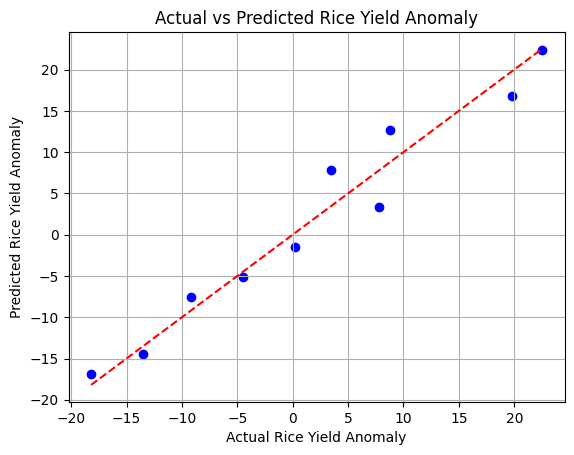

In [2]:
# Create a DataFrame using the available variables
from sklearn.linear_model import LinearRegression


data = {
	'Year': years,
	'Rainfall_Anomaly': rainfall_anomaly,
	'Temperature_Anomaly': temperature_anomaly,
	'Rice_Yield_Anomaly': rice_yield_anomaly
}
df = pd.DataFrame(data)

X = df[['Rainfall_Anomaly', 'Temperature_Anomaly']]
y = df['Rice_Yield_Anomaly']

# Fit the model
model_rice = LinearRegression()
model_rice.fit(X, y)

# Output model coefficients
print("Intercept:", model_rice.intercept_)
print("Coefficients:", model_rice.coef_)
print("R^2 Score:", model_rice.score(X, y))

# Predict yield anomaly using the model
predictions = model_rice.predict(X)

# Plot actual vs predicted
plt.scatter(y, predictions, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Rice Yield Anomaly')
plt.ylabel('Predicted Rice Yield Anomaly')
plt.title('Actual vs Predicted Rice Yield Anomaly')
plt.grid(True)
plt.show()

Intercept: -2.048156564294568
Coefficients: [1.15868379 3.62334754]
R^2 Score: 0.956078565340583


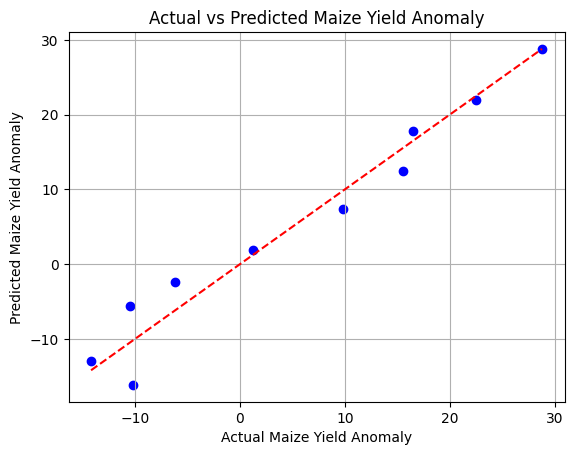

In [3]:
# Create a DataFrame using the available variables
from sklearn.linear_model import LinearRegression


data = {
	'Year': years,
	'Rainfall_Anomaly': rainfall_anomaly,
	'Temperature_Anomaly': temperature_anomaly,
	'Maize_Yield_Anomaly': maize_yield_anomaly
}
df = pd.DataFrame(data)

X = df[['Rainfall_Anomaly', 'Temperature_Anomaly']]
y = df['Maize_Yield_Anomaly']

# Fit the model
model_maize = LinearRegression()
model_maize.fit(X, y)

# Output model coefficients
print("Intercept:", model_maize.intercept_)
print("Coefficients:", model_maize.coef_)
print("R^2 Score:", model_maize.score(X, y))

# Predict yield anomaly using the model
predictions = model_maize.predict(X)

# Plot actual vs predicted
plt.scatter(y, predictions, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Maize Yield Anomaly')
plt.ylabel('Predicted Maize Yield Anomaly')
plt.title('Actual vs Predicted Maize Yield Anomaly')
plt.grid(True)
plt.show()

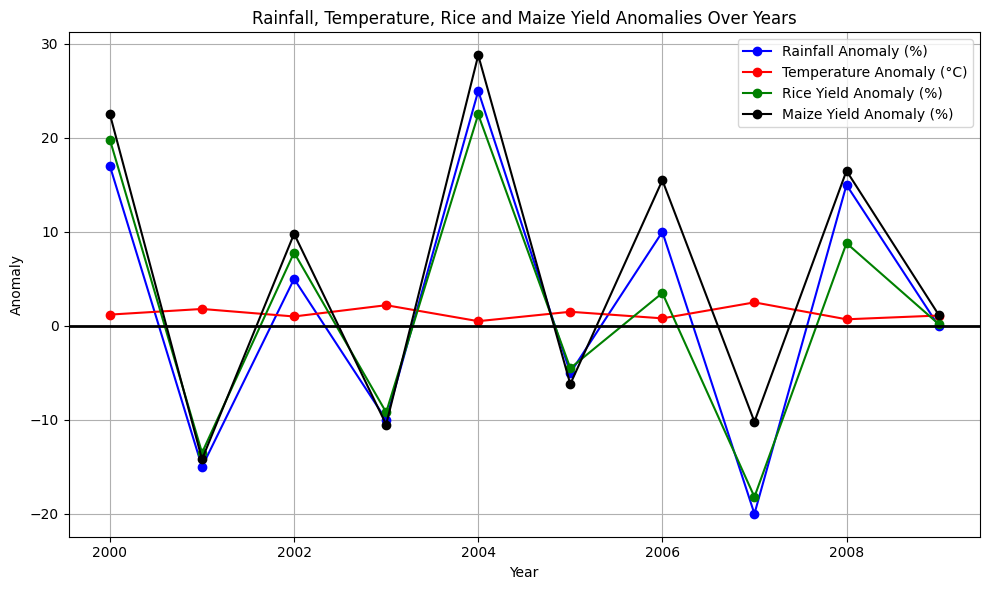

In [4]:
plt.figure(figsize=(10, 6))

# Plot each anomaly
plt.plot(years, rainfall_anomaly, marker='o', label='Rainfall Anomaly (%)', color='blue')
plt.plot(years, temperature_anomaly, marker='o', label='Temperature Anomaly (°C)', color='red')
plt.plot(years, rice_yield_anomaly, marker='o', label='Rice Yield Anomaly (%)', color='green')
plt.plot(years, maize_yield_anomaly, marker='o', label='Maize Yield Anomaly (%)', color='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=1)

# Add labels, title, and legend
plt.title('Rainfall, Temperature, Rice and Maize Yield Anomalies Over Years')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [7]:
# Take input for independent variables
rainfall_input = float(input("Enter Rainfall Anomaly (%): "))
temperature_input = float(input("Enter Temperature Anomaly (°C): "))

# Create a DataFrame for the input
input_data = pd.DataFrame({'Rainfall_Anomaly': [rainfall_input], 'Temperature_Anomaly': [temperature_input]})

# Predict the output using the trained model
predicted_rice_yield_anomaly = model_rice.predict(input_data)
predicted_maize_yield_anomaly=model_maize.predict(input_data)

# Display the prediction
print(f"Predicted Rice Yield Anomaly: {predicted_rice_yield_anomaly[0]:.2f}")
print(f"Predicted maize Yield Anomaly: {predicted_maize_yield_anomaly[0]:.2f}")

Predicted Rice Yield Anomaly: 8.13
Predicted maize Yield Anomaly: 10.13


Correlation Matrix:
                     Rainfall_Anomaly  Temperature_Anomaly  \
Rainfall_Anomaly             1.000000            -0.903973   
Temperature_Anomaly         -0.903973             1.000000   
Rice_Yield_Anomaly           0.974422            -0.844549   
Maize_Yield_Anomaly          0.975517            -0.853331   

                     Rice_Yield_Anomaly  Maize_Yield_Anomaly  
Rainfall_Anomaly               0.974422             0.975517  
Temperature_Anomaly           -0.844549            -0.853331  
Rice_Yield_Anomaly             1.000000             0.955957  
Maize_Yield_Anomaly            0.955957             1.000000  


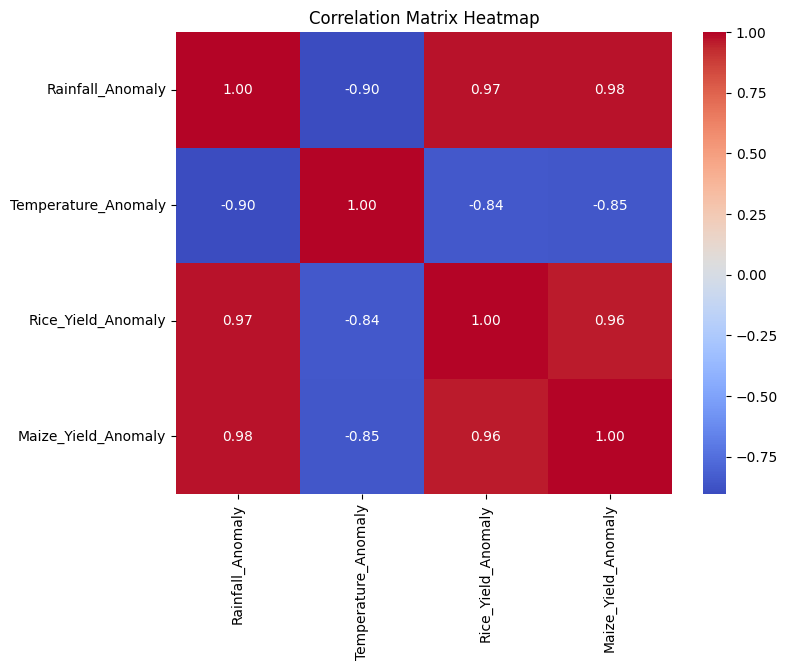

In [6]:
import seaborn as sns

# Select relevant columns for correlation
# Add the 'Rice_Yield_Anomaly' column to the DataFrame if it is missing
if 'Rice_Yield_Anomaly' not in df.columns:
	df['Rice_Yield_Anomaly'] = rice_yield_anomaly

correlation_data = df[['Rainfall_Anomaly', 'Temperature_Anomaly', 'Rice_Yield_Anomaly', 'Maize_Yield_Anomaly']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()